In [169]:
# importing libraries
import yfinance as yf
import pandas as pd
import numpy as np

# reading the data
data = yf.download('TTM').reset_index()
#df = pd.read_csv('NSE_TataGlobal.csv')

print(data.head())
print('\n Shape of the data:')
print(data.shape)

# setting the index as date
#data['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
data.index = data['Date']

#creating dataframe with date and the target variable
#data = df.sort_index(ascending=True, axis=0)
#new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

#for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]

# splitting into train and validation
split = int(len(data) * 0.8)
train = data[:split]
valid = data[split:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

[*********************100%***********************]  1 of 1 completed
        Date  Open  High   Low  Close  Adj Close  Volume
0 2004-09-27  9.15  9.28  9.05   9.15   7.971044  379700
1 2004-09-28  8.85  8.85  8.65   8.76   7.631292  332700
2 2004-09-29  8.76  8.78  8.66   8.75   7.622581  119800
3 2004-09-30  8.89  8.97  8.89   8.97   7.814234  166400
4 2004-10-01  9.14  9.34  9.12   9.25   8.058158  266600

 Shape of the data:
(4399, 7)

 Shape of training set:
(3519, 7)

 Shape of validation set:
(880, 7)


In [170]:
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
#df.index = df['Date']

#sorting
#data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
#new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

#for i in range(0,len(data)):
#    new_data['Date'][i] = data['Date'][i]
#    new_data['Close'][i] = data['Close'][i]

In [171]:
#create features
#from fastai.tabular.all import *
#add_datepart(new_data, 'Date')
#new_data.drop('Elapsed', axis=1, inplace=True)

In [172]:
#new_data['mon_fri'] = 0
#for i in range(0,len(new_data)):
#    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
#        new_data['mon_fri'][i] = 1
#    else:
#        new_data['mon_fri'][i] = 0

In [173]:
#split into train and validation
#train = df[:248]
#valid = df[987:]

x_train = np.array(train['Date']).reshape(-1, 1)
y_train = np.array(train['Close'])
x_valid = np.array(valid['Date']).reshape(-1, 1)
y_valid = np.array(valid['Close'])

In [174]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [175]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
preds

array([ 9.2088889 ,  9.2088889 ,  9.28888883,  9.29777771,  9.03222232,
        9.0822223 ,  9.1299999 ,  9.27999994,  9.39444436,  9.85999997,
       10.16222223, 10.81777785, 11.17000008, 11.2688889 , 11.21111107,
       11.39333333, 11.57222229, 11.69000011, 11.62111123, 10.87222216,
       10.76666662, 10.74111112, 10.81222227, 11.0188889 , 11.39888891,
       11.3322223 , 11.12222226, 10.93777784, 10.86444452, 10.76000002,
       10.61222214, 10.21444437,  9.96888881,  9.72555542,  9.64777766,
        9.6044444 ,  9.76888879,  9.81222216,  9.82222218,  9.66999986,
        9.76777765,  9.93444432,  9.95111105, 10.03222222, 10.05000008,
        9.99777794,  9.78555573,  9.61444452,  9.8133333 ,  9.90444438,
       10.30333328, 10.38333331, 10.63000001, 11.20777777, 11.38666651,
       11.2788887 , 11.14444436, 10.71444437, 10.64999994, 10.93333329,
       11.17222214, 11.55555545, 11.95000002, 12.02333334, 12.36111122,
       12.31666671, 12.21333334, 11.37444454, 10.92888885, 10.81

In [176]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

12.1725551053578

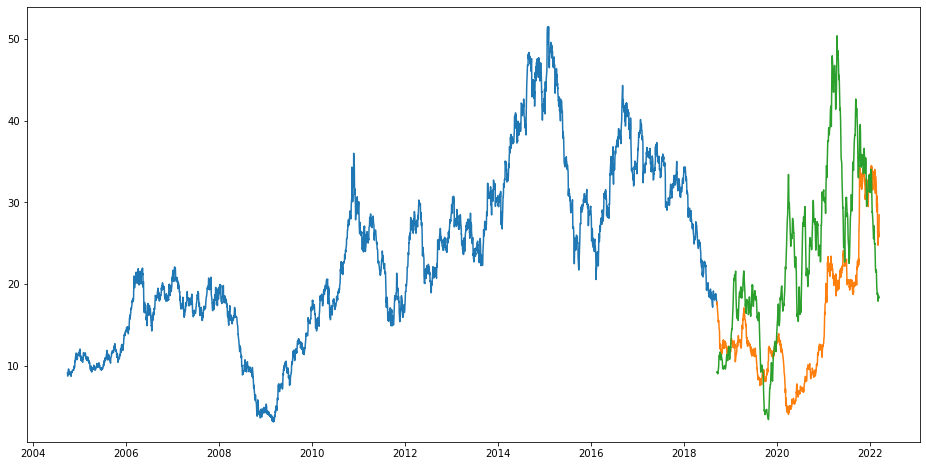

In [177]:
#plot
#valid['Predictions'] = 0
#valid['Predictions'] = preds
plt.figure(figsize=(16,8))
#plt.plot(valid['Close'], preds)
#plt.plot(train['Close'])

plt.plot(train['Date'], train['Close'])
plt.plot(valid['Date'], valid['Close'])
plt.plot(valid['Date'], preds)
plt.show()